In [101]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import pandas as pd 
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Load in the CSV with all the LA County data from The Opportunity Atlas and set tracts as table index
lacounty = pd.read_csv("losangelescountydata.csv").set_index("tract")
lacounty

,Name,Household_Income_at_Age_35_rP_gP_pall,Incarceration_Rate_rP_gP_pall,Teenage_Birth_Rate_women_only_rP_gP_pall,Individual_Income_Excluding_Spouse_at_Age_35_rP_gP_pall,Fraction_Married_at_Age_35_rP_gP_pall,Spouse's_Income_at_Age_35_rP_gP_pall,Employment_Rate_at_Age_35_rP_gP_pall,High_School_Graduation_Rate_rP_gP_pall,College_Graduation_Rate_rP_gP_pall,...,Frac._In_Top_1%_Based_on_Indiv._Income_rP_gP_pall,%_Staying_in_Same_Commuting_Zone_as_Adults_rP_gP_pall,%_Staying_in_Same_Tract_as_Adults_rP_gP_pall,Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall,Individual_Income_Stayed_in_Commuting_Zone_rP_gP_pall,Household_Income_for_U.S._Natives_rP_gP_pall,Household_Income_for_Immigrants_rP_gP_pall,Individual_Income_for_U.S._Natives_rP_gP_pall,Individual_Income_for_Immigrants_rP_gP_pall,Number_of_Children_rP_gP_pall
tract,,,,,,,,,,,,,,,,,,,,,
6029003305,"Frazier Park, CA",48117.0,0.0027,NaN,33613.0,0.4157,38997.0,0.7819,NaN,NaN,...,NaN,0.5614,0.1861,48866.0,31625.0,NaN,NaN,NaN,NaN,852.0
6029003306,"Frazier Park, CA",44224.0,0.0039,NaN,30228.0,0.4836,30393.0,0.7548,NaN,NaN,...,NaN,0.4994,0.2416,37277.0,28253.0,NaN,NaN,NaN,NaN,1156.0
6029005506,"Rosamond, CA",40065.0,0.0172,NaN,28274.0,0.4205,34538.0,0.7363,NaN,NaN,...,NaN,0.5027,0.2025,34953.0,27066.0,NaN,NaN,NaN,NaN,1518.0
6029005700,"Edwards, Edwards Air Force Base, CA",47408.0,0.0088,NaN,31234.0,0.5105,38611.0,0.7934,NaN,NaN,...,NaN,0.4477,0.1423,42953.0,30621.0,NaN,NaN,NaN,NaN,2448.0
6029005801,"Rosamond, CA",43016.0,0.0111,NaN,29385.0,0.4732,36789.0,0.7641,NaN,NaN,...,NaN,0.5314,0.2174,40223.0,27685.0,NaN,NaN,NaN,NaN,1539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111008305,"Simi Valley, CA",62847.0,0.0042,NaN,38540.0,0.5331,48867.0,0.7810,NaN,NaN,...,NaN,0.6915,0.1487,65325.0,39812.0,NaN,NaN,NaN,NaN,724.0
6111008306,"Simi Valley, CA",52164.0,0.0045,NaN,35776.0,0.4395,45810.0,0.7947,NaN,NaN,...,NaN,0.6916,0.1513,52436.0,36533.0,NaN,NaN,NaN,NaN,1030.0
6111008401,"Simi Valley, CA",49062.0,0.0137,NaN,33277.0,0.4683,40922.0,0.7705,NaN,NaN,...,NaN,0.7382,0.2210,50025.0,34151.0,NaN,NaN,NaN,NaN,1314.0


In [3]:
# Filter by only tracts in North Hollywood neighborhood, then general table cleanup
nhollywood = lacounty[lacounty["Name"].str.contains("North Hollywood")]
nhollywood = nhollywood.dropna(axis = 1, how = "all")
nhollywood.columns = nhollywood.columns.str.replace(pat = "_rP_gP_pall", repl = "").str.replace(pat = "_", repl = " ")
nhollywood.head()

,Name,Household Income at Age 35,Incarceration Rate,Individual Income Excluding Spouse at Age 35,Fraction Married at Age 35,Spouse's Income at Age 35,Employment Rate at Age 35,Frac. in Top 20% Based on Household Income,Frac. in Top 20% Based on Indiv Income,% Staying in Same Commuting Zone as Adults,% Staying in Same Tract as Adults,Household Income Stayed in Commuting Zone,Individual Income Stayed in Commuting Zone,Number of Children
tract,,,,,,,,,,,,,,
6037121020,"North Hollywood, Los Angeles, CA",37336.0,0.0000,27413.0,0.3550,38453.0,0.7415,0.1286,0.1490,0.8411,0.2902,39145.0,29469.0,1246.0
6037121600,"North Hollywood, Los Angeles, CA",41107.0,0.0065,28103.0,0.4370,40245.0,0.7022,0.2083,0.2037,0.8269,0.2991,40627.0,28523.0,754.0
6037121801,"North Hollywood, Los Angeles, CA",35111.0,0.0130,27833.0,0.3166,32921.0,0.7434,0.0920,0.1604,0.8100,0.2400,37534.0,30590.0,1266.0
6037121802,"North Hollywood, Los Angeles, CA",40899.0,0.0039,30248.0,0.3698,37816.0,0.7736,0.1762,0.1996,0.8255,0.3079,41217.0,30803.0,1133.0
6037121900,"North Hollywood, Los Angeles, CA",36278.0,0.0085,26839.0,0.3573,34387.0,0.7261,0.1237,0.1686,0.8598,0.3660,37436.0,27782.0,1332.0


In [4]:
# Filter by only tracts in Studio City neighborhood, then general table cleanup
scity = lacounty[lacounty["Name"].str.contains("Studio City")]
scity = scity.dropna(axis = 1, how = "all")
scity.columns = scity.columns.str.replace(pat = "_rP_gP_pall", repl = "").str.replace(pat = "_", repl = " ")
scity.head()

,Name,Household Income at Age 35,Incarceration Rate,Individual Income Excluding Spouse at Age 35,Fraction Married at Age 35,Spouse's Income at Age 35,Employment Rate at Age 35,Frac. in Top 20% Based on Household Income,Frac. in Top 20% Based on Indiv Income,% Staying in Same Commuting Zone as Adults,% Staying in Same Tract as Adults,Household Income Stayed in Commuting Zone,Individual Income Stayed in Commuting Zone,Number of Children
tract,,,,,,,,,,,,,,
6037143300,"Studio City, Los Angeles, CA",48125.0,0.0046,33957.0,0.3800,41883.0,0.7408,0.2949,0.2874,0.7696,0.1953,51225.0,36453.0,801.0
6037143400,"Studio City, Los Angeles, CA",55023.0,0.0040,37721.0,0.4082,46365.0,0.7886,0.3259,0.3826,0.6939,0.1912,56199.0,37931.0,847.0
6037143500,"Studio City, Los Angeles, CA",54305.0,0.0005,37893.0,0.4374,54295.0,0.7463,0.3948,0.4031,0.7520,0.1876,51603.0,37227.0,667.0
6037143602,"Studio City, Los Angeles, CA",58600.0,0.0068,40270.0,0.4789,44873.0,0.8132,0.3785,0.3643,0.6970,0.1723,55754.0,37803.0,506.0
6037143604,"Studio City, Los Angeles, CA",42564.0,0.0070,30117.0,0.4044,37845.0,0.7023,0.2073,0.2402,0.7589,0.0980,46038.0,30594.0,257.0


In [5]:
# Load in the Census Tract shapes and set tracts as integers
tracts = gpd.read_file("tl_2019_06_tract/tl_2019_06_tract.shp")
tracts["GEOID"] = tracts["GEOID"].astype("str").astype("int64")
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,6037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,06,037,139302,6037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."
2,06,037,139502,6037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53225 34.16201, -118.53177 34.1..."
3,06,037,139600,6037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,6037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.50980 34.15691, -118.50848 34.1..."


<AxesSubplot:>

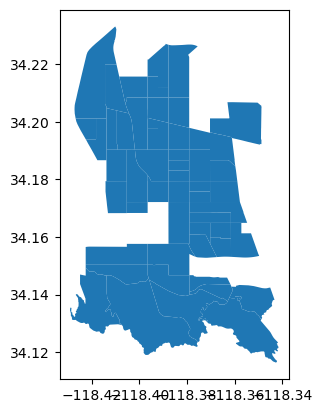

In [6]:
tracts = tracts[tracts["GEOID"].isin(scity.index.values.tolist()+nhollywood.index.values.tolist())]
tracts = tracts.to_crs("EPSG:4326")
tracts.plot()

In [8]:
concatenated = pd.concat([scity.iloc[:, [1]], nhollywood.iloc[:, [1]]]).dropna().reset_index()
merged = tracts.merge(concatenated, left_on = "GEOID", right_on = "tract")
merged.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,tract,Household Income at Age 35
0,06,037,143400,6037143400,1434,Census Tract 1434,G5020,S,1738504,18831,+34.1538507,-118.4110998,"POLYGON ((-118.42250 34.15653, -118.42224 34.1...",6037143400,55023.0
1,06,037,143500,6037143500,1435,Census Tract 1435,G5020,S,1191719,46468,+34.1476412,-118.4067800,"POLYGON ((-118.42250 34.14956, -118.42250 34.1...",6037143500,54305.0
2,06,037,125501,6037125501,1255.01,Census Tract 1255.01,G5020,S,464095,0,+34.1622937,-118.3657855,"POLYGON ((-118.37024 34.16490, -118.36914 34.1...",6037125501,39322.0
3,06,037,123902,6037123902,1239.02,Census Tract 1239.02,G5020,S,664412,0,+34.1758783,-118.3922288,"POLYGON ((-118.39651 34.17889, -118.39651 34.1...",6037123902,43393.0
4,06,037,125401,6037125401,1254.01,Census Tract 1254.01,G5020,S,397783,0,+34.1626066,-118.3743046,"POLYGON ((-118.37898 34.16490, -118.37740 34.1...",6037125401,32745.0


In [15]:
def plotTracts(df,data, cmap):
    f,ax = plt.subplots(1,1, figsize=(2.5, 2.5), 
    sharex=True, sharey=True, dpi=300)
    f.tight_layout()
    plt.title("Expected Household Income by Tract", fontsize = 8)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", 
    pad=0.1,alpha=1)
    df.plot(data, ax=ax, alpha=0.7, cmap=cmap, 
    edgecolor='k', legend=True, cax=cax, linewidth=0.2)
    plt.ylabel('Household Income', fontsize = 8)
    plt.show()

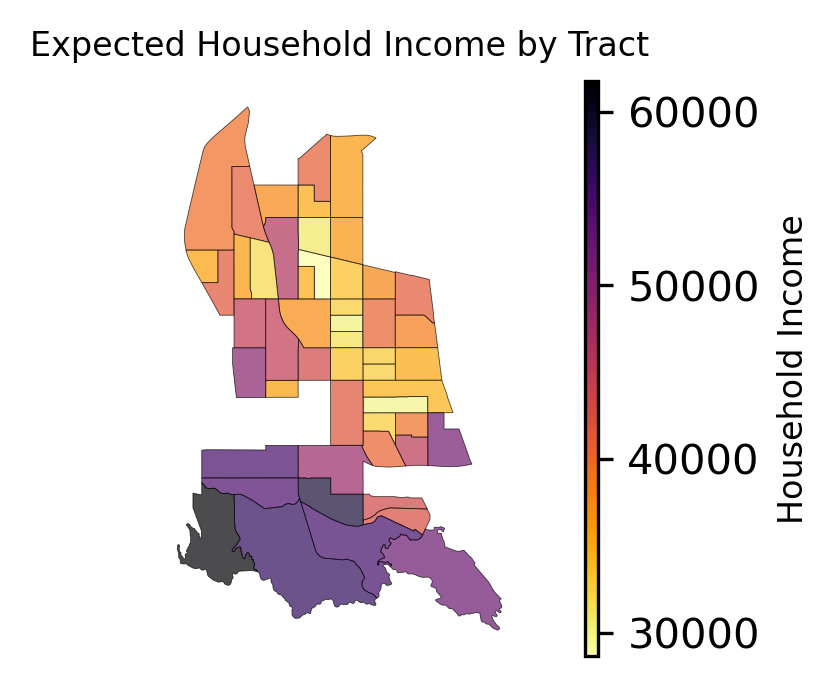

In [16]:
plotTracts(merged, "Household Income at Age 35", "inferno_r")

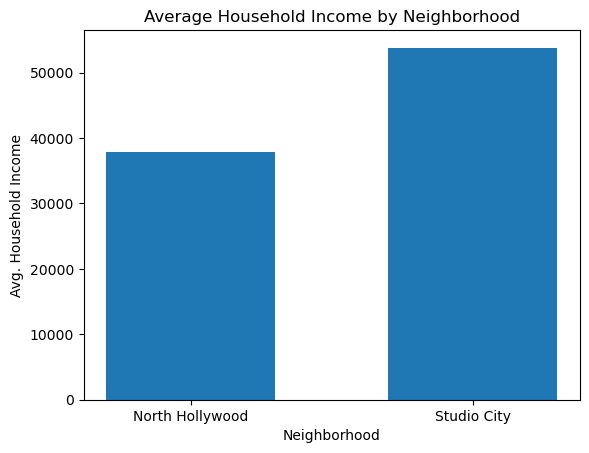

In [61]:
plt.bar(["North Hollywood", "Studio City"], [nholly_avg, scity_avg], width = 0.6)
plt.xlabel("Neighborhood")
plt.ylabel("Avg. Household Income")
plt.title("Average Household Income by Neighborhood")
plt.show()

In [113]:
ethnicities = pd.read_csv("ethnicity_data.csv")
ethnicities

,Ethnicity,North Hollywood Senior,Harvard-Westlake,California,UC Admission Total,UC Berkeley Adm.,UC Davis Adm.,UCLA Adm.
0,African American,0.03,0.07,0.07,0.85,0.00,0.00,0.00
1,American Indian/Alaska Native,0.00,0.01,0.02,NaN,NaN,NaN,NaN
2,Asian,0.11,0.21,0.16,0.81,0.30,0.53,0.24
3,Hispanic,0.64,0.09,0.36,0.56,0.12,0.43,0.00
4,Native Hawaiian/Pacific Islander,0.00,0.00,0.01,NaN,NaN,NaN,NaN
5,White,0.19,0.54,0.35,0.79,0.21,0.58,0.14
6,Two or More Races,0.03,0.08,0.04,0.00,NaN,NaN,NaN


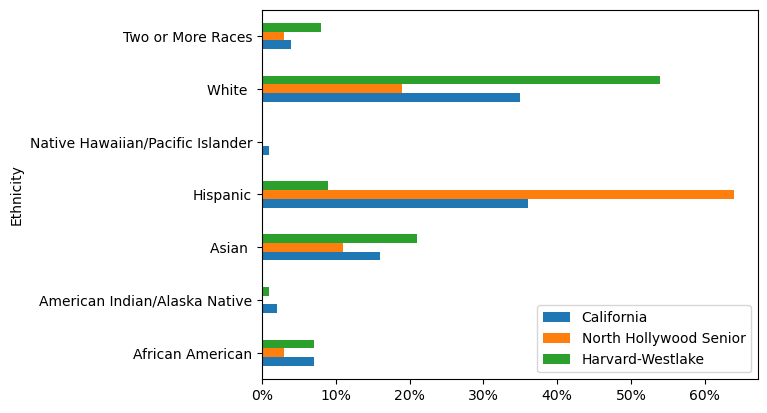

In [126]:
ax = ethnicities.plot.barh(x = "Ethnicity", y = ["California", "North Hollywood Senior", "Harvard-Westlake"], rot = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))

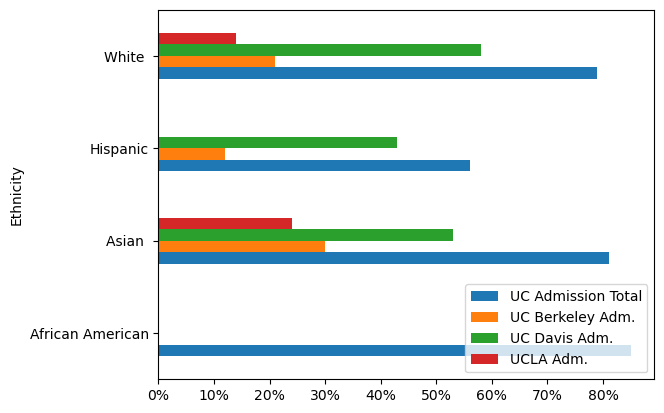

In [129]:
ax = ethnicities.loc[[0, 2, 3, 5], :].plot.barh(x = "Ethnicity", y = [4, 5, 6, 7], rot = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
ax.legend(loc = "lower right")